# Priyanka Kadam

## Task 1 - Prediction using Supervised ML (Level - Beginner)
### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [1]:
# import all reuired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading the file 
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the data

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:


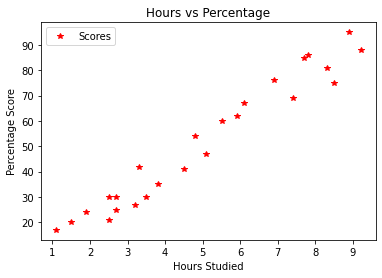

In [5]:
## Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',color = 'red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From above graph we can clearly see there is a positive linear relation bet. no. of hours and percentage of the score

### Preparing the data 
Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

By using Scikit-Learn's built-in train_test_split() method:

In [7]:
# Split this data into a training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [8]:
print("Shape of X_train",X_train.shape)
print("shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (20, 1)
shape of y_train (20,)
Shape of X_test (5, 1)
Shape of y_test (5,)


In [9]:
## After the spliting  now we have to train our algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete!!!!!.")

Training complete!!!!!.


# Plotting Regression Line

In [10]:
print("coefficient =",regressor.coef_)
print("intercept =",regressor.intercept_)

coefficient = [9.91065648]
intercept = 2.018160041434683


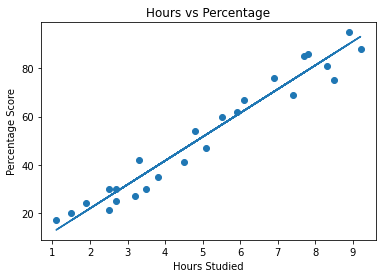

In [11]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(X, line);
plt.show()

### Making the predictions using trained ML Model

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
study = X_test.flatten()
study

array([1.5, 3.2, 7.4, 2.5, 5.9])

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Hrs of study':study,'Actual': y_test, 'Predicted': y_pred})  
df 

,Hrs of study,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [15]:
# Predict the value by own data
hours = [7.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [7.25]
Predicted Score = 73.8704195260909


# Evaluting the model

The final step is to evaluate the performance of algorithm.
This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I have evaluted  model using mean absolute error,mean squared error and root mean squared error


In [16]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
